In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid

In [3]:
# Generate synthetic blob data
blobs_data, blobs_labels = make_blobs(n_samples=300, centers=4, random_state=0, cluster_std=1.0)

# Generate synthetic moon data
moons_data, moons_labels = make_moons(n_samples=300, noise=0.05, random_state=0)

#Scaler for optimised hyperparameters
scaler = StandardScaler()

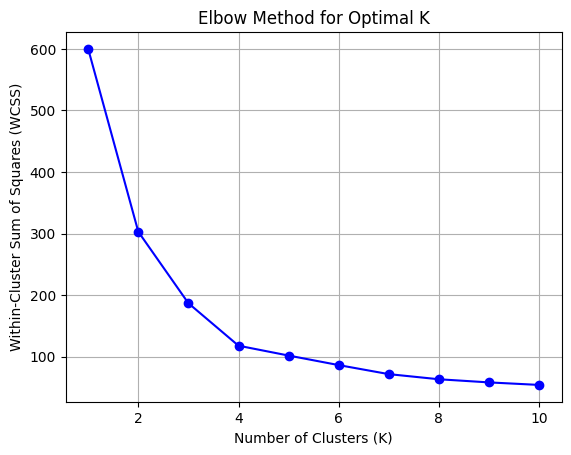

In [4]:
data_scaled = scaler.fit_transform(blobs_data)

# Calculate WCSS for different values of K
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values and look for the elbow point
plt.plot(range(1, 11), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

In [6]:
data_scaled = scaler.fit_transform(moons_data)

# Define a range of values for hyperparameters
param_grid = {
    'eps': [0.1, 0.2, 0.3, 0.4],
    'min_samples': [2, 3, 4, 5]
}

best_silhouette_score = -1
best_params = None

# Grid search loop
for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(**params)
    dbscan_labels = dbscan.fit_predict(data_scaled)
    
    # Calculate Silhouette Score for each combination of hyperparameters
    silhouette_avg = silhouette_score(data_scaled, dbscan_labels)
    
    # Update best hyperparameters and performance if necessary
    if silhouette_avg > best_silhouette_score:
        best_silhouette_score = silhouette_avg
        best_params = params

# Fit DBSCAN with the best hyperparameters
best_dbscan = DBSCAN(**best_params)
best_dbscan_labels = best_dbscan.fit_predict(data_scaled)

print(f'Best Hyperparameters - eps: {best_params["eps"]}, min_samples: {best_params["min_samples"]}')
print(f'Best Silhouette Score: {best_silhouette_score:.2f}')


Best Hyperparameters - eps: 0.3, min_samples: 2
Best Silhouette Score: 0.38


In [59]:
data_scaled = scaler.fit_transform(moons_data)

# Define a list of linkage methods to try
linkage_methods = ['ward', 'complete', 'average', 'single']

best_silhouette_score = -1
best_linkage = None
best_n_clusters = None

# Hyperparameter tuning loop
for linkage in linkage_methods:
    for n_clusters in range(2, 6):  # Try different values for the number of clusters
        hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage)
        hierarchical_labels = hierarchical_clustering.fit_predict(data_scaled)
        
        # Calculate Silhouette Score for each combination of hyperparameters
        silhouette_avg = silhouette_score(data_scaled, hierarchical_labels)
        
        # Update best hyperparameters and performance if necessary
        if silhouette_avg > best_silhouette_score:
            best_silhouette_score = silhouette_avg
            best_linkage = linkage
            best_n_clusters = n_clusters

# Fit Hierarchical Clustering with the best hyperparameters
best_hierarchical_clustering = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage)
best_hierarchical_labels = best_hierarchical_clustering.fit_predict(data_scaled)

print(f'Best Hyperparameters - Linkage: {best_linkage}, Number of Clusters: {best_n_clusters}')
print(f'Best Silhouette Score: {best_silhouette_score:.2f}')


Best Hyperparameters - Linkage: complete, Number of Clusters: 2
Best Silhouette Score: 0.48


In [60]:
# K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_labels = kmeans.fit_predict(blobs_data)

# DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan_labels = dbscan.fit_predict(moons_data)

# Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='complete')
agg_labels = agg_clustering.fit_predict(moons_data)


In [61]:
# Silhouette Score
kmeans_silhouette = silhouette_score(blobs_data, kmeans_labels)
dbscan_silhouette = silhouette_score(moons_data, dbscan_labels)
agg_silhouette = silhouette_score(moons_data, agg_labels)

print(f'K-Means Silhouette Score: {kmeans_silhouette:.2f}')
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.2f}')
print(f'Hierarchical Silhouette Score: {agg_silhouette:.2f}')


K-Means Silhouette Score: 0.50
DBSCAN Silhouette Score: 0.33
Hierarchical Silhouette Score: 0.44


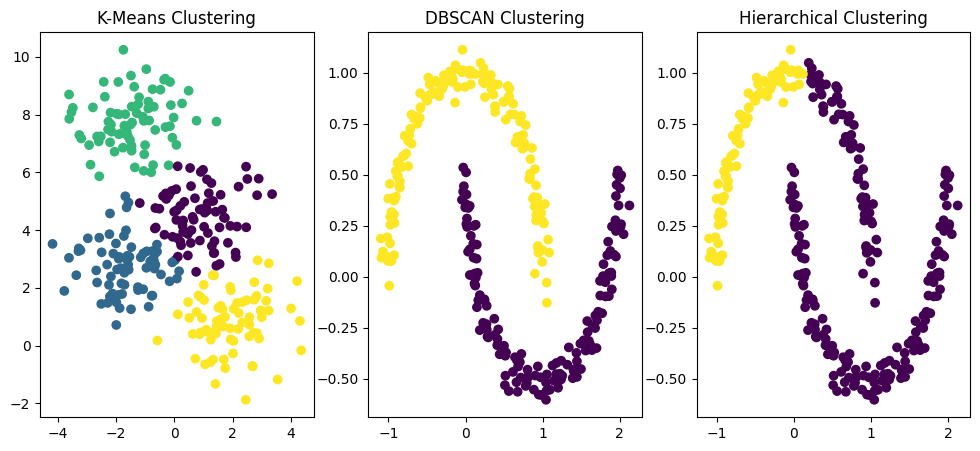

In [62]:
# Plot K-Means Clustering
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
plt.scatter(blobs_data[:, 0], blobs_data[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('K-Means Clustering')

# Plot DBSCAN Clustering
plt.subplot(1, 3, 2)
plt.scatter(moons_data[:, 0], moons_data[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')

# Plot Hierarchical Clustering
plt.subplot(1, 3, 3)
plt.scatter(moons_data[:, 0], moons_data[:, 1], c=agg_labels, cmap='viridis')
plt.title('Hierarchical Clustering')

plt.show()
